In [ ]:
## Set Python - Spark environment.
import os
import sys
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.6-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [ ]:
## Create SparkContext, SparkSession
from os.path import expanduser, join, abspath

from pyspark.sql import SparkSession
from pyspark.sql import Row

# warehouse_location points to the default location for managed databases and tables
warehouse_location = 'hdfs:///apps/hive/warehouse/'

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Hive integration example") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .enableHiveSupport() \
    .getOrCreate()

In [4]:
spark

# Create DataFrames

In [ ]:
# import pyspark class Row from module sql
from pyspark.sql import Row

###  Create Example Data - Departments and Employees

In [5]:
# Create the Departments
department1 = Row(id='123456', name='Deep Learning')
department2 = Row(id='789012', name='IoT')
department3 = Row(id='345678', name='Consulting')
department4 = Row(id='901234', name='Block Chain')

# Create the Employees
Employee = Row("firstName", "lastName", "email", "salary")
employee1 = Employee('echo', 'france', 'no-reply@insofe.edu.in', 100000)
employee2 = Employee('charlie', 'delta', 'no-reply@insofe.edu.con', 120000)
employee3 = Employee('alpha', None, 'no-reply@insofe.edu.net', 140000)
employee4 = Employee(None, 'beta', 'no-reply@insofe.edu', 160000)

# Create the DepartmentWithEmployees instances from Departments and Employees
departmentWithEmployees1 = Row(department=department1, employees=[employee1, employee2])
departmentWithEmployees2 = Row(department=department2, employees=[employee3, employee4])
departmentWithEmployees3 = Row(department=department3, employees=[employee1, employee4])
departmentWithEmployees4 = Row(department=department4, employees=[employee2, employee3])

print department1
print employee2
print departmentWithEmployees1.employees[0].email

Row(id='123456', name='Deep Learning')
Row(firstName='charlie', lastName='delta', email='no-reply@insofe.edu.con', salary=120000)
no-reply@insofe.edu.in


## Create DataFrames from a list of the rows

In [6]:
departmentsWithEmployeesSeq1 = [departmentWithEmployees1, departmentWithEmployees2]

# Create a DataFrame for the above list - departmentsWithEmployeesSeq1
df1 = 

# Display the DataFrame contents df1
df1.show(truncate=False)

+-----------------------+---------------------------------------------------------------------------------------------------+
|department             |employees                                                                                          |
+-----------------------+---------------------------------------------------------------------------------------------------+
|[123456, Deep Learning]|[[echo, france, no-reply@insofe.edu.in, 100000], [charlie, delta, no-reply@insofe.edu.con, 120000]]|
|[789012, IoT]          |[[alpha,, no-reply@insofe.edu.net, 140000], [, beta, no-reply@insofe.edu, 160000]]                 |
+-----------------------+---------------------------------------------------------------------------------------------------+



In [7]:
departmentsWithEmployeesSeq2 = [departmentWithEmployees3, departmentWithEmployees4]

# Create a DataFrame for the above list - departmentsWithEmployeesSeq2
df2 = 

# Display the DataFrame contents df2
df2.show(truncate=False)

+---------------------+----------------------------------------------------------------------------------------------+
|department           |employees                                                                                     |
+---------------------+----------------------------------------------------------------------------------------------+
|[345678, Consulting] |[[echo, france, no-reply@insofe.edu.in, 100000], [, beta, no-reply@insofe.edu, 160000]]       |
|[901234, Block Chain]|[[charlie, delta, no-reply@insofe.edu.con, 120000], [alpha,, no-reply@insofe.edu.net, 140000]]|
+---------------------+----------------------------------------------------------------------------------------------+



## Work with DataFrames

### Union two DataFrames

In [8]:
# union the above two DataFrames df1 and df2 (using union all)
unionDF = 

# Display the DataFrame contents unionDF
unionDF.show(truncate=False)

+-----------------------+---------------------------------------------------------------------------------------------------+
|department             |employees                                                                                          |
+-----------------------+---------------------------------------------------------------------------------------------------+
|[123456, Deep Learning]|[[echo, france, no-reply@insofe.edu.in, 100000], [charlie, delta, no-reply@insofe.edu.con, 120000]]|
|[789012, IoT]          |[[alpha,, no-reply@insofe.edu.net, 140000], [, beta, no-reply@insofe.edu, 160000]]                 |
|[345678, Consulting]   |[[echo, france, no-reply@insofe.edu.in, 100000], [, beta, no-reply@insofe.edu, 160000]]            |
|[901234, Block Chain]  |[[charlie, delta, no-reply@insofe.edu.con, 120000], [alpha,, no-reply@insofe.edu.net, 140000]]     |
+-----------------------+---------------------------------------------------------------------------------------------

### Write the unioned DataFrame to a Parquet file

In [9]:
# Remove the file(directory) if it exists
import os
import shutil

## delete only if file exists ##
filepath = "/home/<user-id>/tmp/spark-df-example.parquet/"
filename = "file:///home/<user-id>/tmp/spark-df-example.parquet/"

if os.path.exists(filepath):
    shutil.rmtree(filepath)

# Write unionDF to a Parquet file
unionDF.write.parquet(filename)

### Read a DataFrame from the Parquet file

In [10]:
parquetDF = 
parquetDF.show(truncate=False)

+-----------------------+---------------------------------------------------------------------------------------------------+
|department             |employees                                                                                          |
+-----------------------+---------------------------------------------------------------------------------------------------+
|[123456, Deep Learning]|[[echo, france, no-reply@insofe.edu.in, 100000], [charlie, delta, no-reply@insofe.edu.con, 120000]]|
|[901234, Block Chain]  |[[charlie, delta, no-reply@insofe.edu.con, 120000], [alpha,, no-reply@insofe.edu.net, 140000]]     |
|[345678, Consulting]   |[[echo, france, no-reply@insofe.edu.in, 100000], [, beta, no-reply@insofe.edu, 160000]]            |
|[789012, IoT]          |[[alpha,, no-reply@insofe.edu.net, 140000], [, beta, no-reply@insofe.edu, 160000]]                 |
+-----------------------+---------------------------------------------------------------------------------------------

### Explode the employees column

In [11]:
from pyspark.sql.functions import explode

# As the employees column contains many details about each employee - explode employee data into a seperate columns
# using the function explode
df = unionDF.select(explode("employees").alias("e"))

explodeDF = df.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")

explodeDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|echo     |france  |no-reply@insofe.edu.in |100000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|alpha    |null    |no-reply@insofe.edu.net|140000|
|null     |beta    |no-reply@insofe.edu    |160000|
|echo     |france  |no-reply@insofe.edu.in |100000|
|null     |beta    |no-reply@insofe.edu    |160000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|alpha    |null    |no-reply@insofe.edu.net|140000|
+---------+--------+-----------------------+------+



### Use filter() to return the rows that match a predicate

In [12]:
# filter rows whose first name is charlie and display in the ascending order of lastname
filterDF = explodeDF.
filterDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
+---------+--------+-----------------------+------+



In [13]:
from pyspark.sql.functions import col, asc

# filter rows whose first name is charlie or echo and display in the ascending order of lastname
# Use '|' instead of 'or'
filterDF = explodeDF.
filterDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|echo     |france  |no-reply@insofe.edu.in |100000|
|echo     |france  |no-reply@insofe.edu.in |100000|
+---------+--------+-----------------------+------+



### The where() clause is equivalent to filter()

In [14]:
# filter rows whose first name is charlie or echo and display in the ascending order of lastname - Using where clause
# Use '|' instead of 'or'
whereDF = explodeDF.
whereDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|echo     |france  |no-reply@insofe.edu.in |100000|
|echo     |france  |no-reply@insofe.edu.in |100000|
+---------+--------+-----------------------+------+



### Replace null values with -- using DataFrame Na function

In [15]:
# Fill null values with "--"

nonNullDF = explodeDF.
nonNullDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|echo     |france  |no-reply@insofe.edu.in |100000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|alpha    |--      |no-reply@insofe.edu.net|140000|
|--       |beta    |no-reply@insofe.edu    |160000|
|echo     |france  |no-reply@insofe.edu.in |100000|
|--       |beta    |no-reply@insofe.edu    |160000|
|charlie  |delta   |no-reply@insofe.edu.con|120000|
|alpha    |--      |no-reply@insofe.edu.net|140000|
+---------+--------+-----------------------+------+



### Retrieve only rows with missing firstName or lastName

In [16]:
# Retrive rows where first and last names are nulls

filterNonNullDF = explodeDF.
filterNonNullDF.show(truncate=False)

+---------+--------+-----------------------+------+
|firstName|lastName|email                  |salary|
+---------+--------+-----------------------+------+
|null     |beta    |no-reply@insofe.edu    |160000|
|null     |beta    |no-reply@insofe.edu    |160000|
|alpha    |null    |no-reply@insofe.edu.net|140000|
|alpha    |null    |no-reply@insofe.edu.net|140000|
+---------+--------+-----------------------+------+



### Example aggregations using agg() and countDistinct()

In [17]:
from pyspark.sql.functions import countDistinct

# Count the persons with the distinct firstname and grouping by first name and last name (use countDistinct)

countDistinctDF = explodeDF.


countDistinctDF.show(truncate=False)

+---------+--------+-------------------------+
|firstName|lastName|count(DISTINCT firstName)|
+---------+--------+-------------------------+
|charlie  |delta   |1                        |
|alpha    |null    |1                        |
|echo     |france  |1                        |
|null     |beta    |0                        |
+---------+--------+-------------------------+



### Compare the DataFrame and SQL query physical plans

** Note: They should be the same **

In [18]:
countDistinctDF.explain()

== Physical Plan ==
*(4) HashAggregate(keys=[firstName#61, lastName#62], functions=[count(distinct firstName#61)])
+- *(4) HashAggregate(keys=[firstName#61, lastName#62], functions=[partial_count(distinct firstName#61)])
   +- *(4) HashAggregate(keys=[firstName#61, lastName#62, firstName#61], functions=[])
      +- Exchange hashpartitioning(firstName#61, lastName#62, firstName#61, 200)
         +- *(3) HashAggregate(keys=[firstName#61, lastName#62, firstName#61], functions=[])
            +- *(3) Project [e#59.firstName AS firstName#61, e#59.lastName AS lastName#62]
               +- Generate explode(employees#1), false, [e#59]
                  +- Union
                     :- *(1) Project [employees#1]
                     :  +- Scan ExistingRDD[department#0,employees#1]
                     +- *(2) Project [employees#13]
                        +- Scan ExistingRDD[department#12,employees#13]


In [19]:
# register the DataFrame as a temp table so that we can query it using SQL
explodeDF.registerTempTable("sql_table_df_example")

# Perform the same query as the DataFrame above and return 'explain'
countDistinctDF_sql = spark.sql("SELECT firstName, lastName, count(distinct firstName) as distinct_first_names FROM sql_table_df_example GROUP BY firstName, lastName")

countDistinctDF_sql.explain()

== Physical Plan ==
*(4) HashAggregate(keys=[firstName#61, lastName#62], functions=[count(distinct firstName#61)])
+- *(4) HashAggregate(keys=[firstName#61, lastName#62], functions=[partial_count(distinct firstName#61)])
   +- *(4) HashAggregate(keys=[firstName#61, lastName#62, firstName#61], functions=[])
      +- Exchange hashpartitioning(firstName#61, lastName#62, firstName#61, 200)
         +- *(3) HashAggregate(keys=[firstName#61, lastName#62, firstName#61], functions=[])
            +- *(3) Project [e#59.firstName AS firstName#61, e#59.lastName AS lastName#62]
               +- Generate explode(employees#1), false, [e#59]
                  +- Union
                     :- *(1) Project [employees#1]
                     :  +- Scan ExistingRDD[department#0,employees#1]
                     +- *(2) Project [employees#13]
                        +- Scan ExistingRDD[department#12,employees#13]


### Sum up all the salaries

In [20]:
salarySumDF = explodeDF.
salarySumDF.show()

+-----------+
|sum(salary)|
+-----------+
|    1040000|
+-----------+



In [21]:
type(explodeDF.salary)

pyspark.sql.column.Column

### Print the summary statistics for the salaries

In [22]:
explodeDF.describe("salary").show()

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|                 8|
|   mean|          130000.0|
| stddev|23904.572186687874|
|    min|            100000|
|    max|            160000|
+-------+------------------+



### An example using pandas and Matplotlib integration

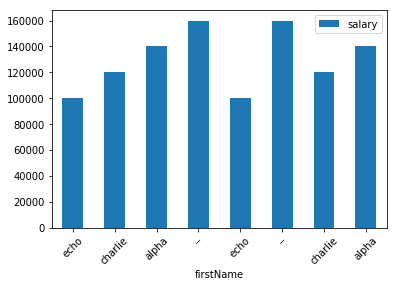

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()

pdDF = nonNullDF.toPandas()
pdDF.plot(x='firstName', y='salary', kind='bar', rot=45)
plt.show()

### Observe the file df_sample
Copy df_sample and df_sample_2.csv files to /home/user-id/tmp/ location

In [24]:
!cat /home/<user-id>/tmp/df_sample

id|end_date|start_date|location
1|2018-10-10 00:00:00|2018-09-14 00:00:00|TS-HYD
2|2018-10-11 01:00:20|2018-08-14 00:00:00|KA-BLR
3|2018-10-12 02:30:00|2018-01-14 00:00:00|TN-CHE
4|2018-10-13 03:00:20|2018-02-14 00:00:00|MH-MUM
5|2018-10-14 04:30:00|2018-04-14 00:00:00|TS-HYD

### Create a DataFrame for the data

In [25]:
df = 
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- location: string (nullable = true)



In [26]:
df.show()

+---+-------------------+-------------------+--------+
| id|           end_date|         start_date|location|
+---+-------------------+-------------------+--------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|
+---+-------------------+-------------------+--------+



#### Instead of registering a UDF, call the builtin functions to perform operations on the columns.
#### This will provide a performance improvement as the builtins compile and run in the platform's JVM.

In [27]:
from pyspark.sql import functions as F
from pyspark.sql.types import *

### Convert to a Date type

In [28]:
# Create a new column 'date' as the date column from 'end_date'
df = df.
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: date (nullable = true)



In [29]:
# Parse out the date only
# Create a new column 'date_only' from 'end_date' and extract only the date part
df = df.
df.show()

+---+-------------------+-------------------+--------+----------+----------+
| id|           end_date|         start_date|location|      date| date_only|
+---+-------------------+-------------------+--------+----------+----------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14|
+---+-------------------+-------------------+--------+----------+----------+



### Split a string and index a field

In [30]:
# Split the 'location' column using the appropriate seperator and extract city name into new column 'city'
df = df.
df.show()

+---+-------------------+-------------------+--------+----------+----------+----+
| id|           end_date|         start_date|location|      date| date_only|city|
+---+-------------------+-------------------+--------+----------+----------+----+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12| CHE|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13| MUM|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14| HYD|
+---+-------------------+-------------------+--------+----------+----------+----+



### Perform a date diff function

In [31]:
# Create a new column 'date_diff' with difference of end_date and start_date in number of days
df = df.
df.show()

+---+-------------------+-------------------+--------+----------+----------+----+---------+
| id|           end_date|         start_date|location|      date| date_only|city|date_diff|
+---+-------------------+-------------------+--------+----------+----------+----+---------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|       26|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|       58|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12| CHE|      271|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13| MUM|      241|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14| HYD|      183|
+---+-------------------+-------------------+--------+----------+----------+----+---------+



## Run SQL queries

In [32]:
df.registerTempTable("sample_df_tbl")

# Display the contents of the above SQL table
spark.sql("select * from sample_df_tbl").show()

+---+-------------------+-------------------+--------+----------+----------+----+---------+
| id|           end_date|         start_date|location|      date| date_only|city|date_diff|
+---+-------------------+-------------------+--------+----------+----------+----+---------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|       26|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|       58|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12| CHE|      271|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13| MUM|      241|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14| HYD|      183|
+---+-------------------+-------------------+--------+----------+----------+----+---------+



### Convert the DataFrame back to JSON strings.

There is an underlying toJSON() function that returns an RDD of JSON strings using the column names and schema to produce the JSON records.

In [33]:
rdd_json = df.
rdd_json.take(2)

[u'{"id":"1","end_date":"2018-10-10 00:00:00","start_date":"2018-09-14 00:00:00","location":"TS-HYD","date":"2018-10-10","date_only":"2018-10-10","city":"HYD","date_diff":26}',
 u'{"id":"2","end_date":"2018-10-11 01:00:20","start_date":"2018-08-14 00:00:00","location":"KA-BLR","date":"2018-10-11","date_only":"2018-10-11","city":"BLR","date_diff":58}']

## UDF
### My UDF takes a parameter including the column to operate on. How do I pass this parameter?
There is a function available called lit() that creates a constant column.

In [34]:
from pyspark.sql import functions as F
from pyspark.sql.functions import udf

add_n = udf(lambda x, y: x + y, IntegerType())

# We register a UDF that adds a column to the DataFrame, and we cast the id column to an Integer type.
df = df.withColumn('id_offset', add_n(F.lit(1000), df.id.cast(IntegerType())))

df.show()

+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+
| id|           end_date|         start_date|location|      date| date_only|city|date_diff|id_offset|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|       26|     1001|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|       58|     1002|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12| CHE|      271|     1003|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13| MUM|      241|     1004|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14| HYD|      183|     1005|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+



### Write UDF

In [35]:
# any constants used by UDF will automatically pass through to workers
# Write udf that retrieves only the rows where date_diff < 90
N = 90
last_n_days = 

df_filtered = df.

df_filtered.show()

+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+
| id|           end_date|         start_date|location|      date| date_only|city|date_diff|id_offset|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|       26|     1001|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|       58|     1002|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+



## Hive Tables

### Access Hive metastore and hive table 

In [5]:
# Both return DataFrame types
from pyspark.sql.functions import *

# Create a DataFrame for the hive table "tcs_stocks" using spark.table option
df_hive_table_1 = spark.table("tcs_stocks_jayantm")
df_hive_table_1.show(10, truncate=False)

+----------+----------+----------+----------+----------+---------+--------+
|Stock_Date|Open      |High      |Low       |Close     |Adj_Close|Volume  |
+----------+----------+----------+----------+----------+---------+--------+
|2004-08-25|149.837006|149.837006|122.375   |123.494003|67.378128|136928  |
|2004-08-26|124.0     |124.625   |121.912003|122.375   |66.767601|40443200|
|2004-08-27|122.800003|122.800003|119.82    |120.332001|65.652962|30646000|
|2004-08-30|121.237999|123.75    |120.625   |123.345001|67.296806|24465208|
|2004-08-31|123.311996|123.75    |122.0     |123.512001|67.387932|21194656|
|2004-09-01|123.75    |124.375   |122.949997|123.487999|67.374817|19935544|
|2004-09-02|123.737999|125.574997|123.25    |124.207001|67.767113|21356352|
|2004-09-03|125.75    |137.5     |123.794998|124.732002|68.053581|9869856 |
|2004-09-06|129.988007|129.988007|124.112999|124.357002|67.848961|9038672 |
|2004-09-07|129.375   |129.375   |124.375   |124.449997|67.899704|5772232 |
+----------+

In [6]:
# Create a DataFrame for the hive table "tcs_stocks" using spark.sql select operation          
df_hive_table_2 = spark.sql("SELECT * FROM tcs_stocks_jayantm")
df_hive_table_2.show(10, truncate=False)

+----------+----------+----------+----------+----------+---------+--------+
|Stock_Date|Open      |High      |Low       |Close     |Adj_Close|Volume  |
+----------+----------+----------+----------+----------+---------+--------+
|2004-08-25|149.837006|149.837006|122.375   |123.494003|67.378128|136928  |
|2004-08-26|124.0     |124.625   |121.912003|122.375   |66.767601|40443200|
|2004-08-27|122.800003|122.800003|119.82    |120.332001|65.652962|30646000|
|2004-08-30|121.237999|123.75    |120.625   |123.345001|67.296806|24465208|
|2004-08-31|123.311996|123.75    |122.0     |123.512001|67.387932|21194656|
|2004-09-01|123.75    |124.375   |122.949997|123.487999|67.374817|19935544|
|2004-09-02|123.737999|125.574997|123.25    |124.207001|67.767113|21356352|
|2004-09-03|125.75    |137.5     |123.794998|124.732002|68.053581|9869856 |
|2004-09-06|129.988007|129.988007|124.112999|124.357002|67.848961|9038672 |
|2004-09-07|129.375   |129.375   |124.375   |124.449997|67.899704|5772232 |
+----------+

### Compute aggregates on columns. 

In [38]:
# Provide the min, count, and avg and groupBy the location column. Diplay the results
agg_df = df.
agg_df.show()

+--------+-------+---------+--------------+
|location|min(id)|count(id)|avg(date_diff)|
+--------+-------+---------+--------------+
|  KA-BLR|      2|        1|          58.0|
|  MH-MUM|      4|        1|         241.0|
|  TS-HYD|      1|        2|         104.5|
|  TN-CHE|      3|        1|         271.0|
+--------+-------+---------+--------------+



### Write out the DataFrames to Parquet, but would like to partition on a particular column.

In [39]:
# Derive two new columns end_month and end_year where
# end_month holds only the month part from end_date column and
# end_year holds only the year part from end_date column
df = df.
df = df.
df.show()

+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+---------+--------+
| id|           end_date|         start_date|location|      date| date_only|city|date_diff|id_offset|end_month|end_year|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+---------+--------+
|  1|2018-10-10 00:00:00|2018-09-14 00:00:00|  TS-HYD|2018-10-10|2018-10-10| HYD|       26|     1001|       10|    2018|
|  2|2018-10-11 01:00:20|2018-08-14 00:00:00|  KA-BLR|2018-10-11|2018-10-11| BLR|       58|     1002|       10|    2018|
|  3|2018-10-12 02:30:00|2018-01-14 00:00:00|  TN-CHE|2018-10-12|2018-10-12| CHE|      271|     1003|       10|    2018|
|  4|2018-10-13 03:00:20|2018-02-14 00:00:00|  MH-MUM|2018-10-13|2018-10-13| MUM|      241|     1004|       10|    2018|
|  5|2018-10-14 04:30:00|2018-04-14 00:00:00|  TS-HYD|2018-10-14|2018-10-14| HYD|      183|     1005|       10|    2018|
+---+-------------------+-------

In [40]:
# Write above DataFrame to a parquet file partitioned by end_year and end_month
# Remove the file(directory) if it exists
import os
import shutil

## delete only if file exists ##
filepath = "/home/<user-id>/tmp/spark_df_example2.parquet"
filename = "file:///home/<user-id>/tmp/spark_df_example2.parquet/"

if os.path.exists(filepath):
    shutil.rmtree(filepath)

df.write.

In [41]:
!ls /home/<user-id>/tmp/spark_df_example2.parquet/

end_year=2018  _SUCCESS


In [42]:
!ls /home/<user-id>/tmp/spark_df_example2.parquet/end_year\=2018

end_month=10


In [43]:
!ls /home/<user-id>/tmp/spark_df_example2.parquet/end_year\=2018/end_month\=10

part-00000-4273a79d-b6e2-4eb0-ba05-a137356c2010.c000.snappy.parquet


In [44]:
parquetDF2 = spark.read.parquet(filename)
parquetDF2.show(truncate=False)

+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+--------+---------+
|id |end_date           |start_date         |location|date      |date_only |city|date_diff|id_offset|end_year|end_month|
+---+-------------------+-------------------+--------+----------+----------+----+---------+---------+--------+---------+
|1  |2018-10-10 00:00:00|2018-09-14 00:00:00|TS-HYD  |2018-10-10|2018-10-10|HYD |26       |1001     |2018    |10       |
|2  |2018-10-11 01:00:20|2018-08-14 00:00:00|KA-BLR  |2018-10-11|2018-10-11|BLR |58       |1002     |2018    |10       |
|3  |2018-10-12 02:30:00|2018-01-14 00:00:00|TN-CHE  |2018-10-12|2018-10-12|CHE |271      |1003     |2018    |10       |
|4  |2018-10-13 03:00:20|2018-02-14 00:00:00|MH-MUM  |2018-10-13|2018-10-13|MUM |241      |1004     |2018    |10       |
|5  |2018-10-14 04:30:00|2018-04-14 00:00:00|TS-HYD  |2018-10-14|2018-10-14|HYD |183      |1005     |2018    |10       |
+---+-------------------+-------

### Handle cases where I want to filter out NULL data

In [45]:
null_item_schema = StructType([StructField("col1", StringType(), True),
                               StructField("col2", IntegerType(), True)])

null_df = spark.createDataFrame([("test", 1), (None, 2)], null_item_schema)
null_df.show()

+----+----+
|col1|col2|
+----+----+
|test|   1|
|null|   2|
+----+----+



In [46]:
# Extract only the data where col1 value is NOT NULL
null_df.

+----+----+
|col1|col2|
+----+----+
|test|   1|
+----+----+



### Infer the schema using the CSV or spark-avro libraries

Read csv file "df_sample_2.csv" and inferschema

In [47]:
# Create a DataFrame for df_sample_2.csv file and inferschema
sample_df_2 = 

sample_df_2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- end_date: timestamp (nullable = true)
 |-- start_date: timestamp (nullable = true)
 |-- location: string (nullable = true)

